# Project: Investigate TMDb movie dataset

* Table of Contents
- Data Wrangling
- Conclusions

Here, using TMDb movie dataset and doing an Investigation for it and get some insights.

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue and other columns.

So,going throught data wrangling prosses which As we known include four phases:
gathering, Assessing and define and cleaning.

- gathering: the data by downloading it and import it using pandas.
- Assessing and define: Assessing the dataset by two ways: Visually and programmatically to explore it and then define all what it need to cleaned which will be showen later.
- Data cleaning: in this phase clean all what mentioned above.
- Data Analysis: get insight and answer question using the dataset.

And want to use it to answer some questions like:

- What is the most popular genre?
- Do top ratings movies always generate big revenue?
- Do higher budget movies always generate big revenue?
- Is there any impact of vote count on revenue?
- Is there ang corrolation between revenue and budget?
And more question.

So, let`s go!

In [1]:
# import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Data Wrangling

- Phase one: Data Gathering

In [2]:
# read the dataset
TMDb_movies = pd.read_csv('tmdb-movies.csv')

In [3]:
TMDb_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# get the shape
TMDb_movies.shape

(10866, 21)

### Phase two: Assessing Data

- first: Visually
- then: Programmatically

In [5]:
# Visually
#make max columns by 30 to see all columns 
pd.set_option('display.max_columns', 30)
TMDb_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [6]:
TMDb_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
# Programaticly
TMDb_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
#show the info, find nan values and know the datatype of eacy columns
print(TMDb_movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
#check for duplicated by id
TMDb_movies['id'].duplicated().value_counts()

False    10865
True         1
Name: id, dtype: int64

In [10]:
#check for duplicated by imdb_id
TMDb_movies['imdb_id'].duplicated().value_counts()

False    10856
True        10
Name: imdb_id, dtype: int64

In [11]:
#check for duplicated by the title of the movie
TMDb_movies['original_title'].duplicated().value_counts()

False    10571
True       295
Name: original_title, dtype: int64

In [12]:
#see the duplicated titles
TMDb_movies['original_title'].value_counts()

Hamlet                       4
Life                         3
Emma                         3
Wuthering Heights            3
Oliver Twist                 3
                            ..
She's Out of My League       1
The Night Flier              1
Sinister                     1
Annapolis                    1
Pussy Riot: A Punk Prayer    1
Name: original_title, Length: 10571, dtype: int64

In [13]:
#see counts of uniqe genres values
# =>> Which genres are most popular from year to year?
TMDb_movies['genres'].value_counts()

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Thriller|Adventure|Drama|Crime                1
Fantasy|Adventure|Action|Comedy|Drama         1
Comedy|Drama|Family|Fantasy|TV Movie          1
Fantasy|Animation|Horror|Action|Thriller      1
Horror|Fantasy|Thriller                       1
Name: genres, Length: 2039, dtype: int64

### Define

- min equal to 0 in popularity, budget,	revenue and runtime	
- some columns has NAN values
- none numeric columns
- 10 >> 295 duplicated rows
- Certain columns, like ‘cast’and ‘genres’, contain multiple separated by pipe (|) characters.
- maybe split genres column each into 2 or more 
- drop or set avrage for nan values
- remove all non numerical columns

### Phase 3: Data cleaning
- Make a copy of the original data set before doing anything

In [14]:
TMDb_movies_clean = TMDb_movies.copy()

### start cleaning

#### 1- delete 295 duplicated (by :original_title) rows
- using drop_duplicates

In [15]:
TMDb_movies_clean.drop_duplicates( subset =['original_title'],
    inplace = True, ignore_index = True )
TMDb_movies_clean.reset_index(drop=True)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10566,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10567,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10568,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10569,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [16]:
TMDb_movies_clean.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [17]:
#test for duplicated by the title of the movie
TMDb_movies_clean['original_title'].duplicated().value_counts()

False    10571
Name: original_title, dtype: int64

In [18]:
#test and check if  duplicated values still existent
sum(TMDb_movies_clean['original_title'].duplicated())

0

In [19]:
TMDb_movies_clean.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [20]:
TMDb_movies_clean.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### 2- drop non numerical columns
=>> 'id', 'imdb_id', 'popularity', 'budget', 'revenue', 
        'runtime',  'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'

=>> 'original_title', 'director' ,'genres','production_companies',

In [21]:
TMDb_movies_clean.drop(['imdb_id', 'cast', 'homepage','tagline', 'keywords', 'overview' ], axis= 1 , inplace = True)

In [22]:
TMDb_movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10571 entries, 0 to 10570
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10571 non-null  int64  
 1   popularity            10571 non-null  float64
 2   budget                10571 non-null  int64  
 3   revenue               10571 non-null  int64  
 4   original_title        10571 non-null  object 
 5   director              10528 non-null  object 
 6   runtime               10571 non-null  int64  
 7   genres                10548 non-null  object 
 8   production_companies  9552 non-null   object 
 9   release_date          10571 non-null  object 
 10  vote_count            10571 non-null  int64  
 11  vote_average          10571 non-null  float64
 12  release_year          10571 non-null  int64  
 13  budget_adj            10571 non-null  float64
 14  revenue_adj           10571 non-null  float64
dtypes: float64(4), int6

#### 3- split release_date column into 3 columns:
- year
- month
- day

In [23]:
TMDb_movies_clean['release_date'] = pd.to_datetime(TMDb_movies_clean['release_date'])

TMDb_movies_clean['release_month'] = TMDb_movies_clean['release_date'].dt.month
TMDb_movies_clean['release_day'] = TMDb_movies_clean['release_date'].dt.day

TMDb_movies_clean = TMDb_movies_clean.drop('release_date', axis=1)

#### 4- drop non numerical columns
=>> 'original_title', 'director' ,'genres','production_companies'

In [24]:
TMDb_movies_clean.dropna(subset =['genres'],inplace = True)
TMDb_movies_clean.reset_index(drop=True)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,6,9
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,5,13
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,3,18
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,12,15
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10543,21,0.080598,0,0,The Endless Summer,Bruce Brown,95,Documentary,Bruce Brown Films,11,7.4,1966,0.000000e+00,0.000000e+00,6,15
10544,20379,0.065543,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,0.000000e+00,0.000000e+00,12,21
10545,39768,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00,1,1
10546,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00,11,2


#### remove all the rows with zero values 
- in runtime , budget or revenue
=>> which index that this data is not valid

In [25]:
# Clean the invalid data and check the statistics again
index_err = TMDb_movies_clean.query('runtime == 0 or budget == 0 or revenue == 0').index
TMDb_movies_clean.drop(index_err, axis=0, inplace=True)

TMDb_movies_clean.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day
count,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000
mean,40557.264643,1.194688,3.752862e+07,1.082386e+08,109.177316,530.734824,6.164004,2001.538339,4.436703e+07,1.363931e+08,7.039670,15.400958
std,67866.292487,1.486161,4.244601e+07,1.770478e+08,19.879316,885.741290,0.794936,11.061930,4.498007e+07,2.158969e+08,3.366202,8.445078
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,1.000000,1.000000
25%,6430.000000,0.463133,1.000000e+07,1.358668e+07,95.000000,71.000000,5.675000,1996.000000,1.319180e+07,1.830994e+07,4.000000,8.000000
50%,11370.500000,0.798343,2.400000e+07,4.483448e+07,105.000000,205.000000,6.200000,2004.000000,3.014881e+07,6.092554e+07,7.000000,15.000000
75%,39713.500000,1.374400,5.000000e+07,1.256217e+08,119.000000,581.250000,6.700000,2010.000000,6.061307e+07,1.619430e+08,10.000000,22.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,12.000000,31.000000


In [29]:
TMDb_movies_num_clean = TMDb_movies_clean.drop(['original_title', 'director' ,'genres','production_companies' ], axis= 1)

In [30]:
# Clean the invalid data and check the statistics again
index_err = TMDb_movies_num_clean.query('runtime == 0 or budget == 0 or revenue == 0').index
TMDb_movies_num_clean.drop(index_err, axis=0, inplace=True)

TMDb_movies_num_clean.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day
count,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000
mean,40557.264643,1.194688,3.752862e+07,1.082386e+08,109.177316,530.734824,6.164004,2001.538339,4.436703e+07,1.363931e+08,7.039670,15.400958
std,67866.292487,1.486161,4.244601e+07,1.770478e+08,19.879316,885.741290,0.794936,11.061930,4.498007e+07,2.158969e+08,3.366202,8.445078
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,1.000000,1.000000
25%,6430.000000,0.463133,1.000000e+07,1.358668e+07,95.000000,71.000000,5.675000,1996.000000,1.319180e+07,1.830994e+07,4.000000,8.000000
50%,11370.500000,0.798343,2.400000e+07,4.483448e+07,105.000000,205.000000,6.200000,2004.000000,3.014881e+07,6.092554e+07,7.000000,15.000000
75%,39713.500000,1.374400,5.000000e+07,1.256217e+08,119.000000,581.250000,6.700000,2010.000000,6.061307e+07,1.619430e+08,10.000000,22.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,12.000000,31.000000


In [31]:
TMDb_movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 10556
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3756 non-null   int64  
 1   popularity            3756 non-null   float64
 2   budget                3756 non-null   int64  
 3   revenue               3756 non-null   int64  
 4   original_title        3756 non-null   object 
 5   director              3755 non-null   object 
 6   runtime               3756 non-null   int64  
 7   genres                3756 non-null   object 
 8   production_companies  3711 non-null   object 
 9   vote_count            3756 non-null   int64  
 10  vote_average          3756 non-null   float64
 11  release_year          3756 non-null   int64  
 12  budget_adj            3756 non-null   float64
 13  revenue_adj           3756 non-null   float64
 14  release_month         3756 non-null   int64  
 15  release_day         

In [32]:
TMDb_movies_num_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 10556
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3756 non-null   int64  
 1   popularity     3756 non-null   float64
 2   budget         3756 non-null   int64  
 3   revenue        3756 non-null   int64  
 4   runtime        3756 non-null   int64  
 5   vote_count     3756 non-null   int64  
 6   vote_average   3756 non-null   float64
 7   release_year   3756 non-null   int64  
 8   budget_adj     3756 non-null   float64
 9   revenue_adj    3756 non-null   float64
 10  release_month  3756 non-null   int64  
 11  release_day    3756 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 510.5 KB


In [33]:
TMDb_movies_clean['genres'].value_counts()

Drama                                                 241
Comedy                                                232
Comedy|Romance                                        104
Drama|Romance                                         104
Comedy|Drama|Romance                                   87
                                                     ... 
Comedy|Family|Fantasy|Science Fiction                   1
Adventure|Action|Animation|Fantasy|Science Fiction      1
Crime|Drama|Action|Thriller|Science Fiction             1
Crime|Mystery                                           1
Fantasy|Action|Thriller|Science Fiction                 1
Name: genres, Length: 1033, dtype: int64

In [34]:
TMDb_movies_clean

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,6,9
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,5,13
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,3,18
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,12,15
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10531,396,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Mike Nichols,131,Drama,Chenault Productions,74,7.5,1966,5.038511e+07,2.266436e+08,6,21
10536,5780,0.402730,3000000,13000000,Torn Curtain,Alfred Hitchcock,128,Mystery|Thriller,Universal Pictures,46,6.3,1966,2.015404e+07,8.733419e+07,7,13
10537,6644,0.395668,4653000,6000000,El Dorado,Howard Hawks,120,Action|Western,Paramount Pictures|Laurel Productions,36,6.9,1966,3.125892e+07,4.030809e+07,12,17
10543,5923,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,28,7.0,1966,8.061618e+07,1.343603e+08,12,20


In [35]:
#TMDb_movies_num_clean['revenue'].value_counts()
TMDb_movies_num_clean['revenue_adj'].value_counts()
#TMDb_movies_num_clean['budget'].plot.kde()

3.172146e+07    2
1.000000e+06    2
2.633157e+07    2
8.990674e+07    2
1.177534e+08    2
               ..
2.241936e+08    1
3.645082e+07    1
2.087052e+08    1
1.308557e+08    1
7.940726e+07    1
Name: revenue_adj, Length: 3751, dtype: int64

### Phase 4: Data analysis

- get insights.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>,
        <AxesSubplot:title={'center':'release_month'}>,
        <AxesSubplot:title={'center':'release_day'}>]], dtype=object)

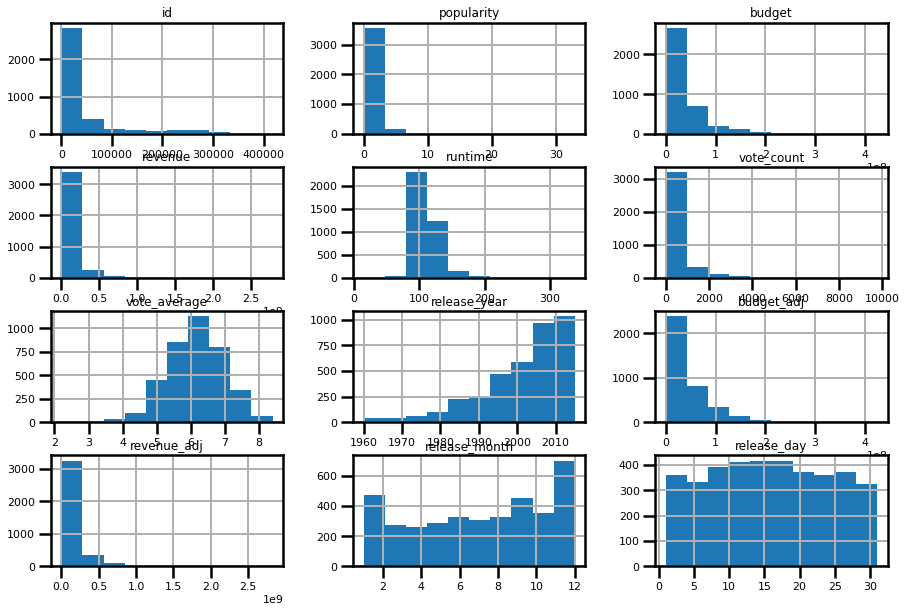

In [117]:
#visual hist
TMDb_movies_num_clean.hist(figsize=(15,10))

#### 1- genres
- Which genres are most popular from year to year?

In [126]:
df_genres = TMDb_movies_clean[['release_year', 'genres', 'popularity','budget','revenue','vote_average']]
df_genres.head()

,release_year,genres,popularity,budget,revenue,vote_average
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763,150000000,1513528810,6.5
1,2015,Action|Adventure|Science Fiction|Thriller,28.419936,150000000,378436354,7.1
2,2015,Adventure|Science Fiction|Thriller,13.112507,110000000,295238201,6.3
3,2015,Action|Adventure|Science Fiction|Fantasy,11.173104,200000000,2068178225,7.5
4,2015,Action|Crime|Thriller,9.335014,190000000,1506249360,7.3


In [127]:
# Split the row with more than one genre into different rows

from itertools import chain

# Return list from series of '|'-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))

# Calculate lengths of splits
lens = df_genres['genres'].str.split('|').map(len)

# Create new dataframe, repeating or chaining as appropriate
df_genres = pd.DataFrame({'release_year': np.repeat(df_genres['release_year'], lens),                       
                          'genres': chainer(df_genres['genres']),
                          'popularity': np.repeat(df_genres['popularity'], lens),
                          'vote_average': np.repeat(df_genres['vote_average'], lens),
                          'revenue': np.repeat(df_genres['revenue'], lens)}
                        )

df_genres.head()
#df_genres.shape

,release_year,genres,popularity,vote_average,revenue
0,2015,Action,32.985763,6.5,1513528810
0,2015,Adventure,32.985763,6.5,1513528810
0,2015,Science Fiction,32.985763,6.5,1513528810
0,2015,Thriller,32.985763,6.5,1513528810
1,2015,Action,28.419936,7.1,378436354


In [38]:
sum(df_genres['popularity'].duplicated())

6267

In [39]:
TMDb_movies_num_clean['revenue'].sort_values(ascending= False)


1383    2781505847
3       2068178225
5187    1845034188
4322    1519557910
0       1513528810
           ...    
5118             5
8374             5
3216             3
5024             2
8012             2
Name: revenue, Length: 3756, dtype: int64

In [40]:
#df_genres['genres'].value_counts().index
df_genres['genres'].value_counts()

Drama              1713
Comedy             1339
Thriller           1168
Action             1057
Adventure           727
Romance             650
Crime               636
Science Fiction     501
Horror              432
Family              413
Fantasy             385
Mystery             329
Animation           195
Music               132
History             127
War                 116
Western              52
Documentary          35
Foreign              13
TV Movie              1
Name: genres, dtype: int64

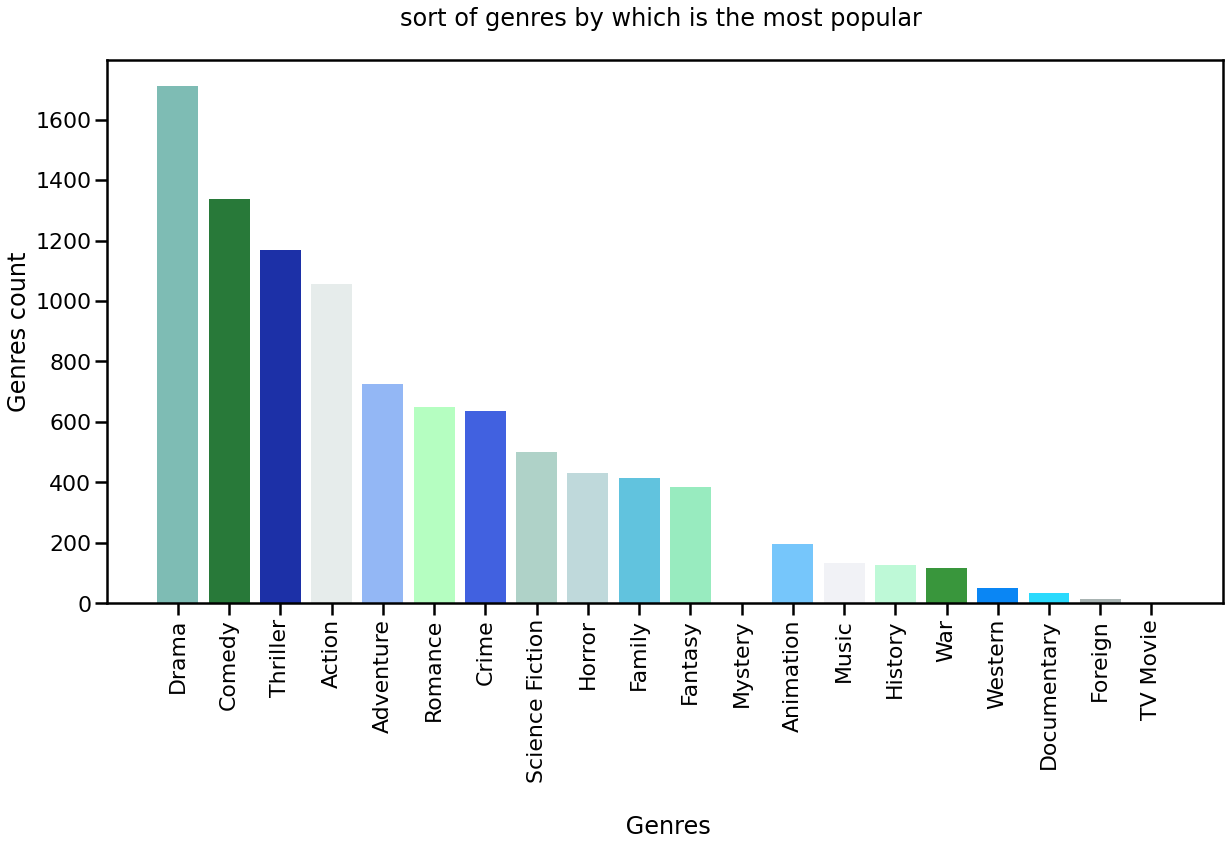

In [58]:
sns.set_context('poster',font_scale=1)
fig, ax = plt.subplots(figsize=(20,10))
#arr =['Drama','Comedy', 'Thriller','Action ','Adventure','Romance','Crime', 'Science Fiction' ,'Horror', 'Family', 'Fantasy', 'Mystery' ,'Animation', 'Music' ,'History' ,'War' ,'Western', 'Documentary','Foreign' ,'TV Movie']

from random import randint
colors = []

for i in range(20):
    colors.append('#%08X' % randint(0, 0xFFFFFF))
    
ax.bar(df_genres['genres'].value_counts().index,df_genres['genres'].value_counts(), color= colors)
plt.xticks( rotation='vertical')

ax.set_title('sort of genres by which is the most popular \n')
ax.set_xlabel('\n Genres')
ax.set_ylabel('Genres count')

fig_plot = plt.gcf() 
fig_plot.savefig('sort of genres.png',bbox_inches='tight');

Text(0, 0.5, ' popularity')

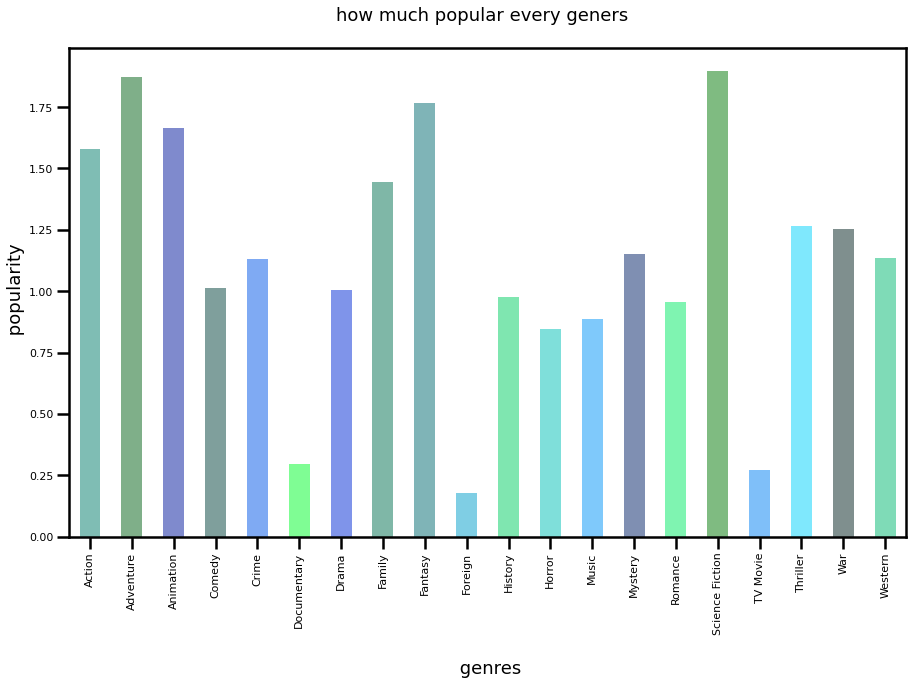

In [125]:

moviegen_pop = df_genres.groupby('genres')['popularity'].mean()

moviegen_pop.plot(kind ='bar', figsize=(15,9),alpha =0.5 , color= colors)
plt.title('how much popular every geners  \n',fontsize =18)
plt.xlabel('\n genres',fontsize =18)
plt.ylabel(' popularity',fontsize =18)


### which genres is the most popular over years ?!

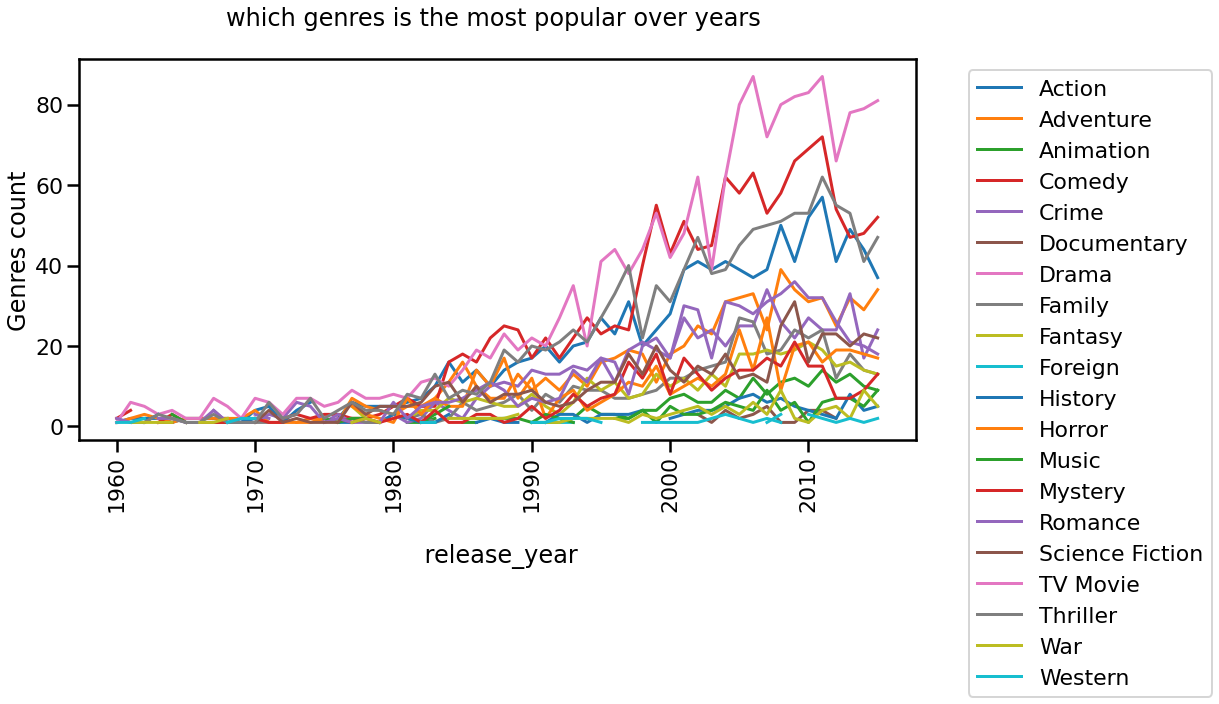

In [53]:
fig, ax =plt.subplots(figsize = (15,7))

out = df_genres.groupby(['release_year','genres']).count()['popularity'].unstack().plot(ax =ax,figsize=(15,7))
plt.xticks( rotation='vertical')

ax.set_title('which genres is the most popular over years \n')
ax.set_xlabel('\n release_year')
ax.set_ylabel('Genres count')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [82]:
# A function is defined for the selection
def func(group):
    return group.loc[group['popularity'] == group['popularity'].max()]

#Calculate the mean popularity for each genre in each year
df_pop = df_genres.groupby(['release_year', 'genres'], as_index=False).mean()

# Select the most popular genre for each year
df_most_pop = df_pop.groupby('release_year', as_index=False).apply(func).reset_index(drop=True)
df_most_pop.head()

,release_year,genres,popularity,revenue
0,1960,Action,1.872132,4905000.0
1,1960,Adventure,1.872132,4905000.0
2,1960,Western,1.872132,4905000.0
3,1961,Animation,2.631987,215880014.0
4,1962,Thriller,3.170651,59600000.0


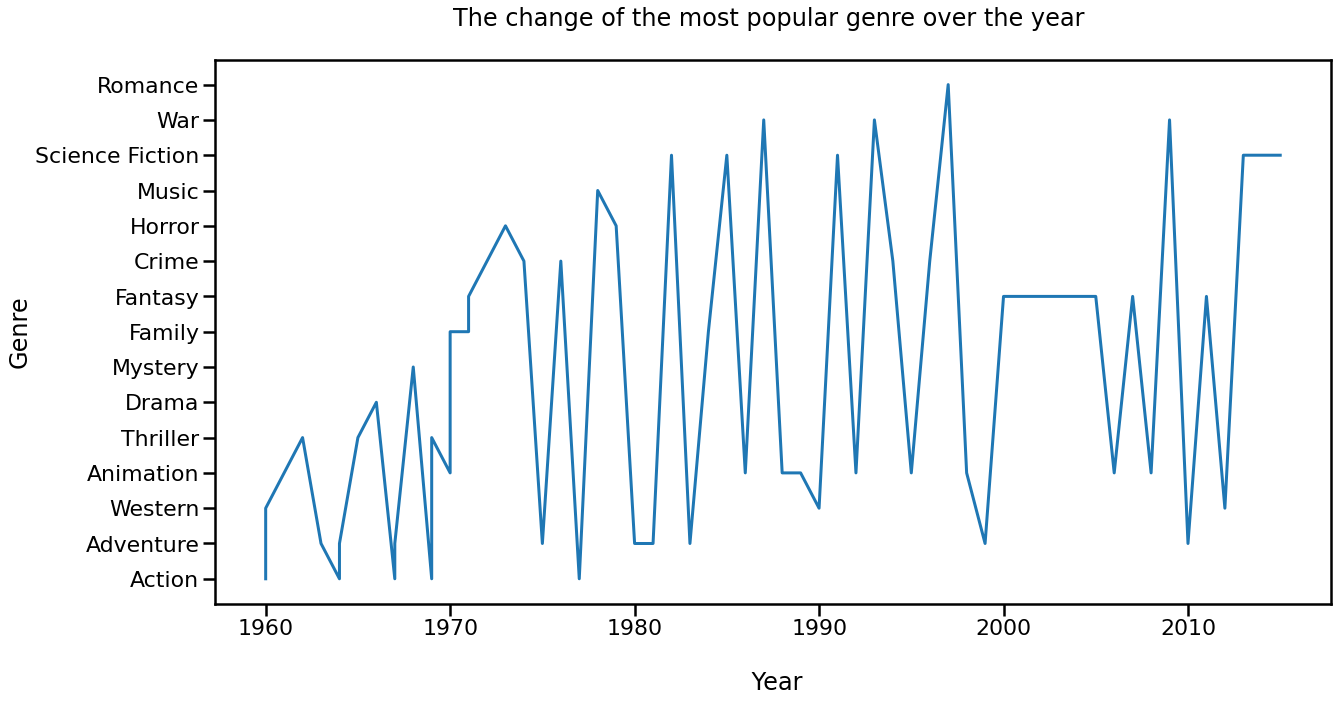

<Figure size 432x288 with 0 Axes>

In [91]:
# Draw the scatter plot to show the change of the most popular genre
sns.set_context(font_scale=1)
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df_most_pop.release_year, df_most_pop.genres)
ax.set_title('The change of the most popular genre over the year \n')
ax.set_xlabel('\n Year')
ax.set_ylabel('Genre')

plt.show()

fig_plot = plt.gcf() 
fig_plot.savefig('genres over years.png',bbox_inches='tight');

### Question 

#### what genres is the highest rating?

In [128]:
# make movies grouping by genres and vote_average
gengre_rating = df_genres.groupby('genres') ['vote_average'].mean()

gengre_rating

genres
Action             6.034721
Adventure          6.117194
Animation          6.366154
Comedy             6.024869
Crime              6.296698
Documentary        6.660000
Drama              6.398015
Family             6.116707
Fantasy            6.067532
Foreign            6.123077
History            6.579528
Horror             5.657407
Music              6.320455
Mystery            6.180547
Romance            6.192923
Science Fiction    6.025349
TV Movie           5.600000
Thriller           6.057363
War                6.587069
Western            6.467308
Name: vote_average, dtype: float64

(0.0, 8.0)

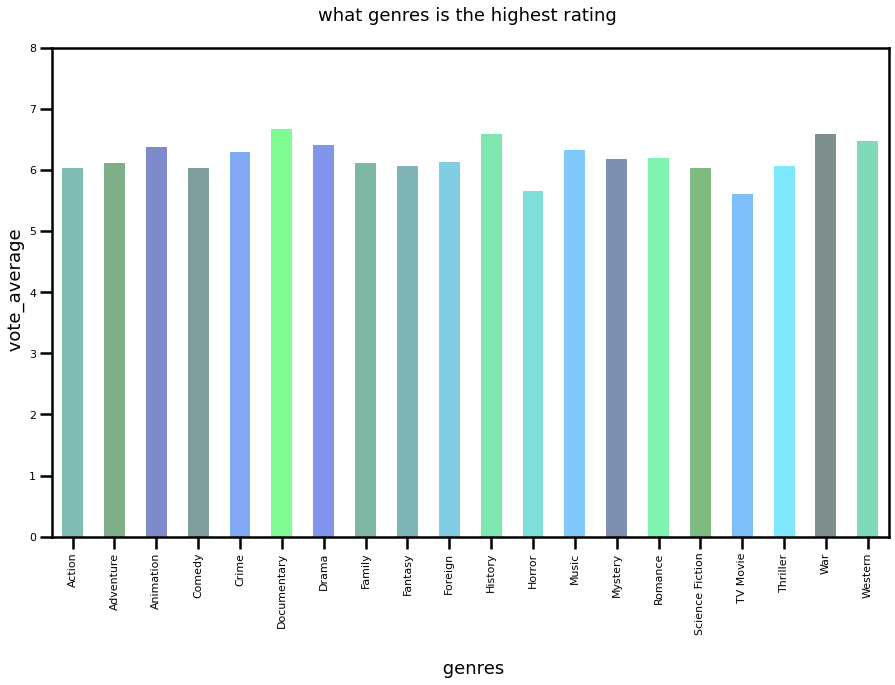

In [137]:
gengre_rating.plot(kind ='bar', figsize=(15,9),alpha =0.5 , color= colors)
plt.title('what genres is the highest rating \n',fontsize =18)
plt.xlabel('\n genres',fontsize =18)
plt.ylabel(' vote_average',fontsize =18)
plt.ylim(0,8)

#### 2- revenues
- What kinds of properties are associated with movies that have high revenues?

In [85]:
TMDb_movies_clean.columns
TMDb_movies_clean.shape

(3756, 16)

## question?

### The revenue change vs budget from year to year!
### Do higher budget movies always generate big revenue?

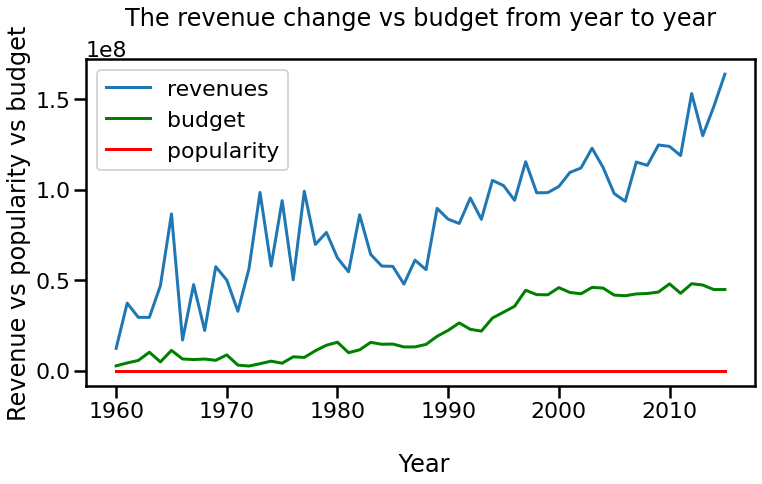

<Figure size 432x288 with 0 Axes>

In [92]:
# Draw the line char for the change of the revenue vs budget
revenues = TMDb_movies_num_clean.groupby('release_year')['revenue'].mean()
budget = TMDb_movies_num_clean.groupby('release_year')['budget'].mean()
popularity = TMDb_movies_num_clean.groupby('release_year')['popularity'].mean()

fig, axes = plt.subplots(figsize=(12,6))
axes.plot(revenues, label='revenues')
axes.plot(budget,'g-', label='budget')
axes.plot(popularity,'r-', label='popularity')
#axes.figsize((12,5))
axes.set_title('The revenue change vs budget from year to year\n');
#axes.title('The revenue change from year to year\n')
axes.set_xlabel('\n Year')
axes.set_ylabel('Revenue vs popularity vs budget')
axes.legend()
plt.show()

fig_plot = plt.gcf() 
fig_plot.savefig('The revenue change vs budget from year to year.png',bbox_inches='tight');

## question?

### is the revenue increase over the time? 

In [87]:
# Aggregate years into decades
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2015]
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
TMDb_movies_num_clean['decade'] = pd.cut(TMDb_movies_num_clean['release_year'], bin_edges, labels=bin_names)
TMDb_movies_num_clean.head()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day,decade
0,135397,32.985763,150000000,1513528810,124,5562,6.5,2015,1.379999e+08,1.392446e+09,6,9,2010s
1,76341,28.419936,150000000,378436354,120,6185,7.1,2015,1.379999e+08,3.481613e+08,5,13,2010s
2,262500,13.112507,110000000,295238201,119,2480,6.3,2015,1.012000e+08,2.716190e+08,3,18,2010s
3,140607,11.173104,200000000,2068178225,136,5292,7.5,2015,1.839999e+08,1.902723e+09,12,15,2010s
4,168259,9.335014,190000000,1506249360,137,2947,7.3,2015,1.747999e+08,1.385749e+09,4,1,2010s


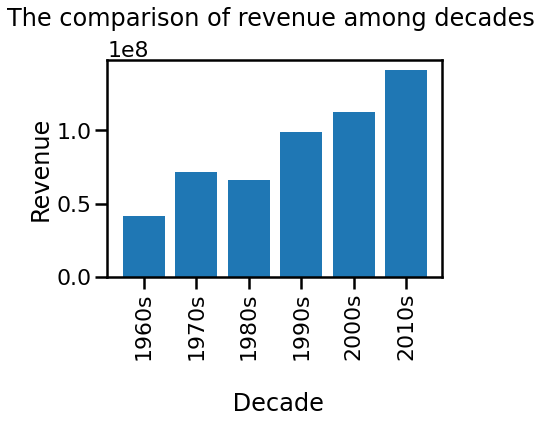

<Figure size 432x288 with 0 Axes>

In [125]:
# Draw the bar chart to compare the revenue in differet decades
rev_dis = TMDb_movies_num_clean.groupby('decade').revenue.mean()

plt.bar(rev_dis.index, rev_dis.values)
plt.title('The comparison of revenue among decades \n')
plt.xlabel('\n Decade')
plt.ylabel('Revenue')
plt.xticks( rotation='vertical')
plt.show()

fig_plot = plt.gcf() 
fig_plot.savefig('The comparison of revenue among decades',bbox_inches='tight');

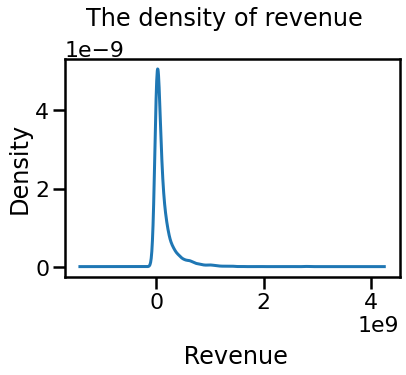

In [59]:
TMDb_movies_num_clean['revenue_adj'].plot.density()

plt.title('The density of revenue  \n')
plt.xlabel('\n Revenue')
plt.show()

## question?

### is there a correlation between Popularity and Revenue?

In [62]:
# Extract the movies which acheive revenue dataframe
#high_revenue = df.revenue.quantile(.75)
ache_rev_df = TMDb_movies_num_clean[TMDb_movies_num_clean.revenue > TMDb_movies_num_clean.budget]
ache_rev_df.revenue.describe()

count    2.700000e+03
mean     1.446193e+08
std      1.968307e+08
min      1.100000e+01
25%      3.291677e+07
50%      7.881234e+07
75%      1.728887e+08
max      2.781506e+09
Name: revenue, dtype: float64

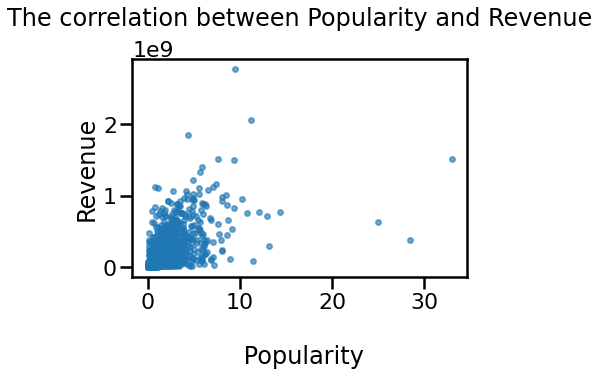

In [63]:
# Draw the scatter plot of the popularity and revenue
plt.scatter(x=ache_rev_df.popularity, y=ache_rev_df.revenue, s =25, alpha =0.6)
plt.title('The correlation between Popularity and Revenue\n')
plt.xlabel('\n Popularity')
plt.ylabel('Revenue')

plt.show()

### question

### what is the correlation between all the columns?

Text(0.5, 1.0, 'what is the correlation between all the columns? \n')

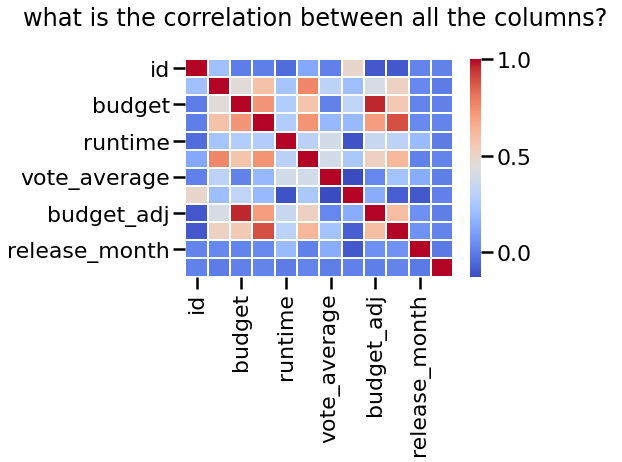

In [64]:
sns.heatmap(ache_rev_df.corr(),linewidths=1, cmap='coolwarm')

plt.title('what is the correlation between all the columns? \n')


### question 
 
### Is there any impact of vote count on revenue?


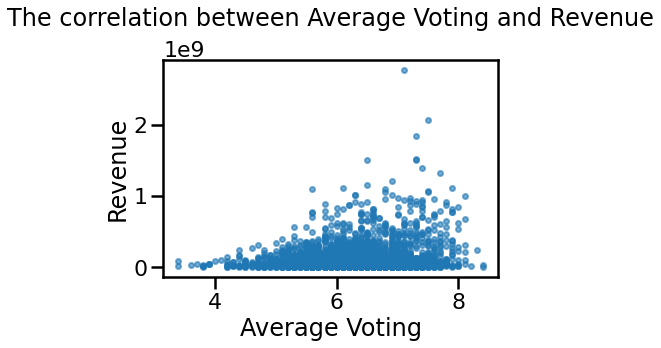

In [66]:
# Draw the scatterplot of the vote_average and revenue
plt.scatter(x=ache_rev_df.vote_average, y=ache_rev_df.revenue, s =25, alpha =0.6)
plt.title('The correlation between Average Voting and Revenue\n')
plt.xlabel('Average Voting')
plt.ylabel('Revenue')

plt.show()

### question 

### Is there any impact of genres on revenue?

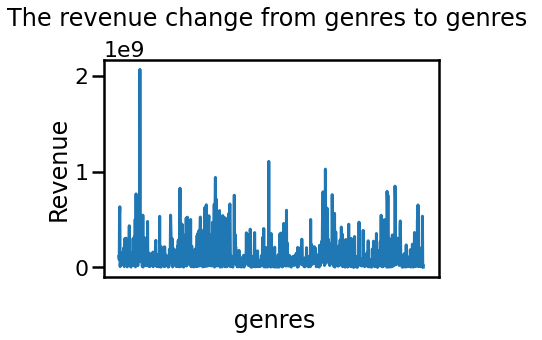

In [92]:
# Draw the line char for the change of the revenue
revenues_genres = TMDb_movies_clean.groupby('genres')['revenue'].mean()

plt.plot(revenues_genres)
plt.title('The revenue change from genres to genres \n')
plt.xlabel('\n genres')
plt.ylabel('Revenue')
plt.xticks([], rotation='vertical')
plt.show()

### question
#### what is the revenue change from year to year ?

Text(0, 0.5, 'Revenue')

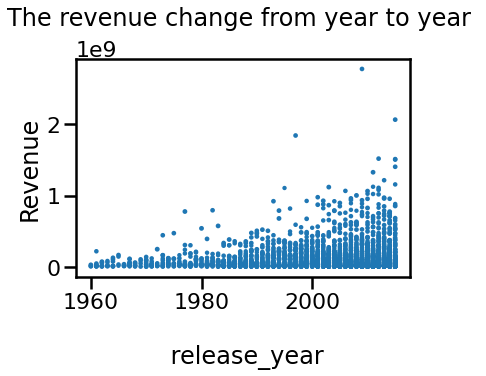

In [93]:
TMDb_movies_num_clean.plot.scatter(x='release_year',y='revenue',s=TMDb_movies_num_clean['vote_average'])

plt.title('The revenue change from year to year \n')
plt.xlabel('\n release_year')
plt.ylabel('Revenue')

Text(0, 0.5, 'Revenue')

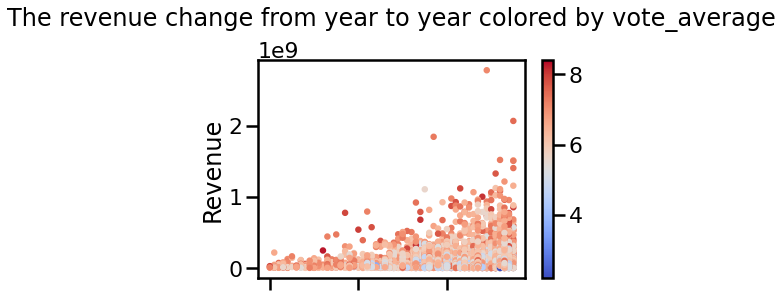

In [97]:
TMDb_movies_num_clean.plot.scatter(x='release_year',y='revenue',
                                   c=TMDb_movies_num_clean['vote_average'],
                                   colormap='coolwarm')

plt.title('The revenue change from year to year colored by vote_average\n')
plt.xlabel('\nrelease_year')
plt.ylabel('Revenue')

Text(0, 0.5, 'Revenue change \n vs budget')

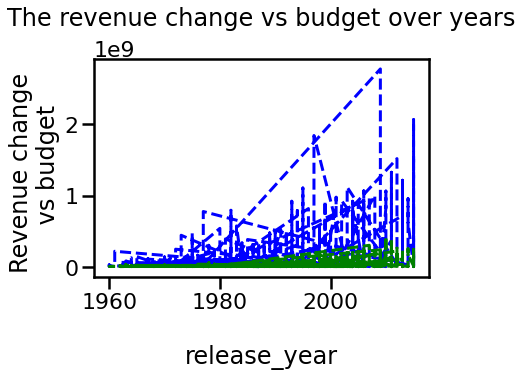

In [99]:
fig, ax = plt.subplots()

ax.plot(TMDb_movies_num_clean['release_year'], TMDb_movies_num_clean['revenue'],'b--',
        TMDb_movies_num_clean['release_year'], TMDb_movies_num_clean['budget'],'g--')

plt.title('The revenue change vs budget over years\n')
plt.xlabel('\nrelease_year')
plt.ylabel('Revenue change \n vs budget')

### question 

#### is there a colloration between revenue and budget ?

Text(336.9714285714286, 0.5, 'Revenue change ')

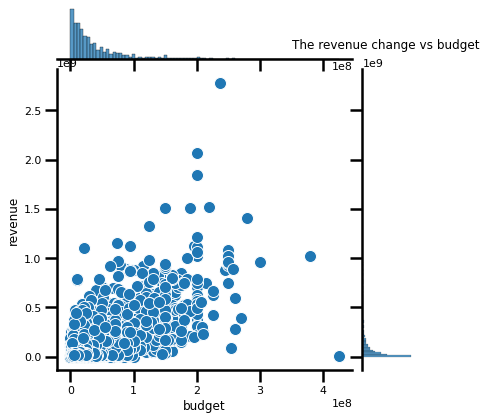

In [148]:
sns.jointplot( x ='budget',y='revenue',data=TMDb_movies_num_clean,kind='scatter')

plt.title('colloration between revenue and budget \n')
plt.xlabel('\n budget ')
plt.ylabel('Revenue change ')

Text(605.2507142857141, 0.5, 'Revenue change \n vs budget')

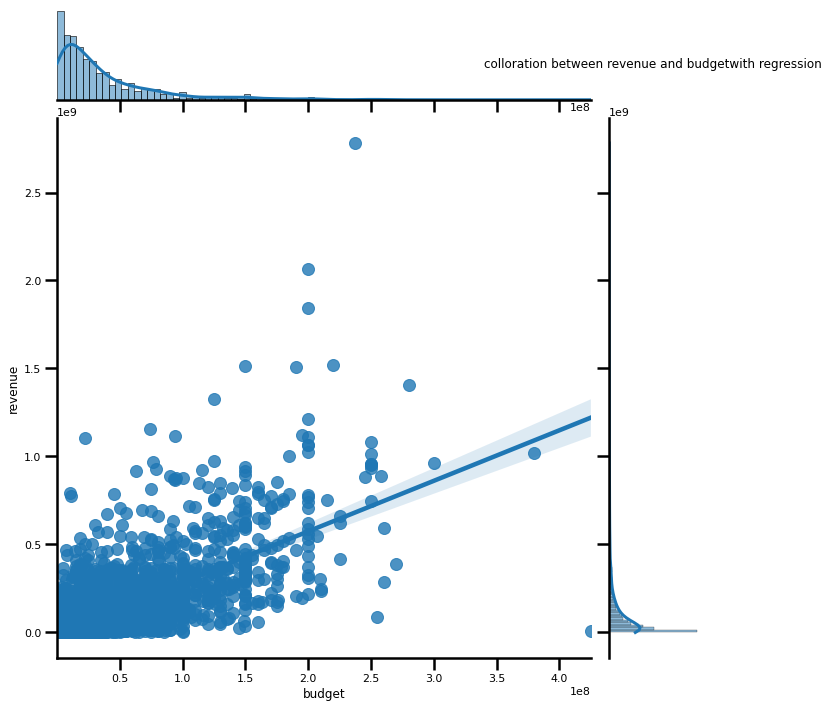

In [149]:
sns.jointplot( x ='budget',y='revenue',data=TMDb_movies_num_clean,kind='reg',height=10)

fig_plot = plt.gcf() 
fig_plot.savefig('The comparison of revenue over budget',bbox_inches='tight');

plt.title('colloration between revenue and budgetwith regression \n \n \n', )
plt.xlabel('\nrelease_year')
plt.ylabel('Revenue change \n vs budget')

### The vote_average change over vote_count !

Text(0, 0.5, 'vote_average')

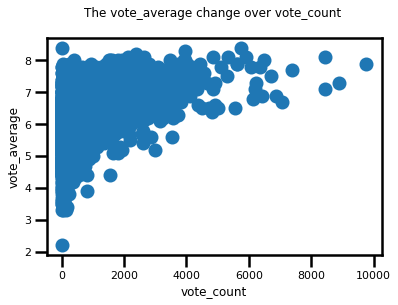

In [108]:
plt.scatter(TMDb_movies_clean['vote_count'],TMDb_movies_clean['vote_average'])

plt.title('The vote_average change over vote_count \n')
plt.xlabel('vote_count')
plt.ylabel('vote_average')

### question

#### is The vote_average change affect by revenue

Text(0, 0.5, 'vote_average')

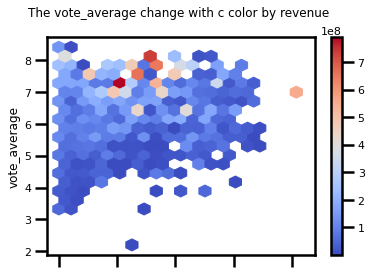

In [110]:
TMDb_movies_clean.plot.hexbin(x='id',y='vote_average', C ='revenue', gridsize=20,colormap='coolwarm' )

plt.title('The vote_average change with c color by revenue \n')
plt.xlabel('id')
plt.ylabel('vote_average')

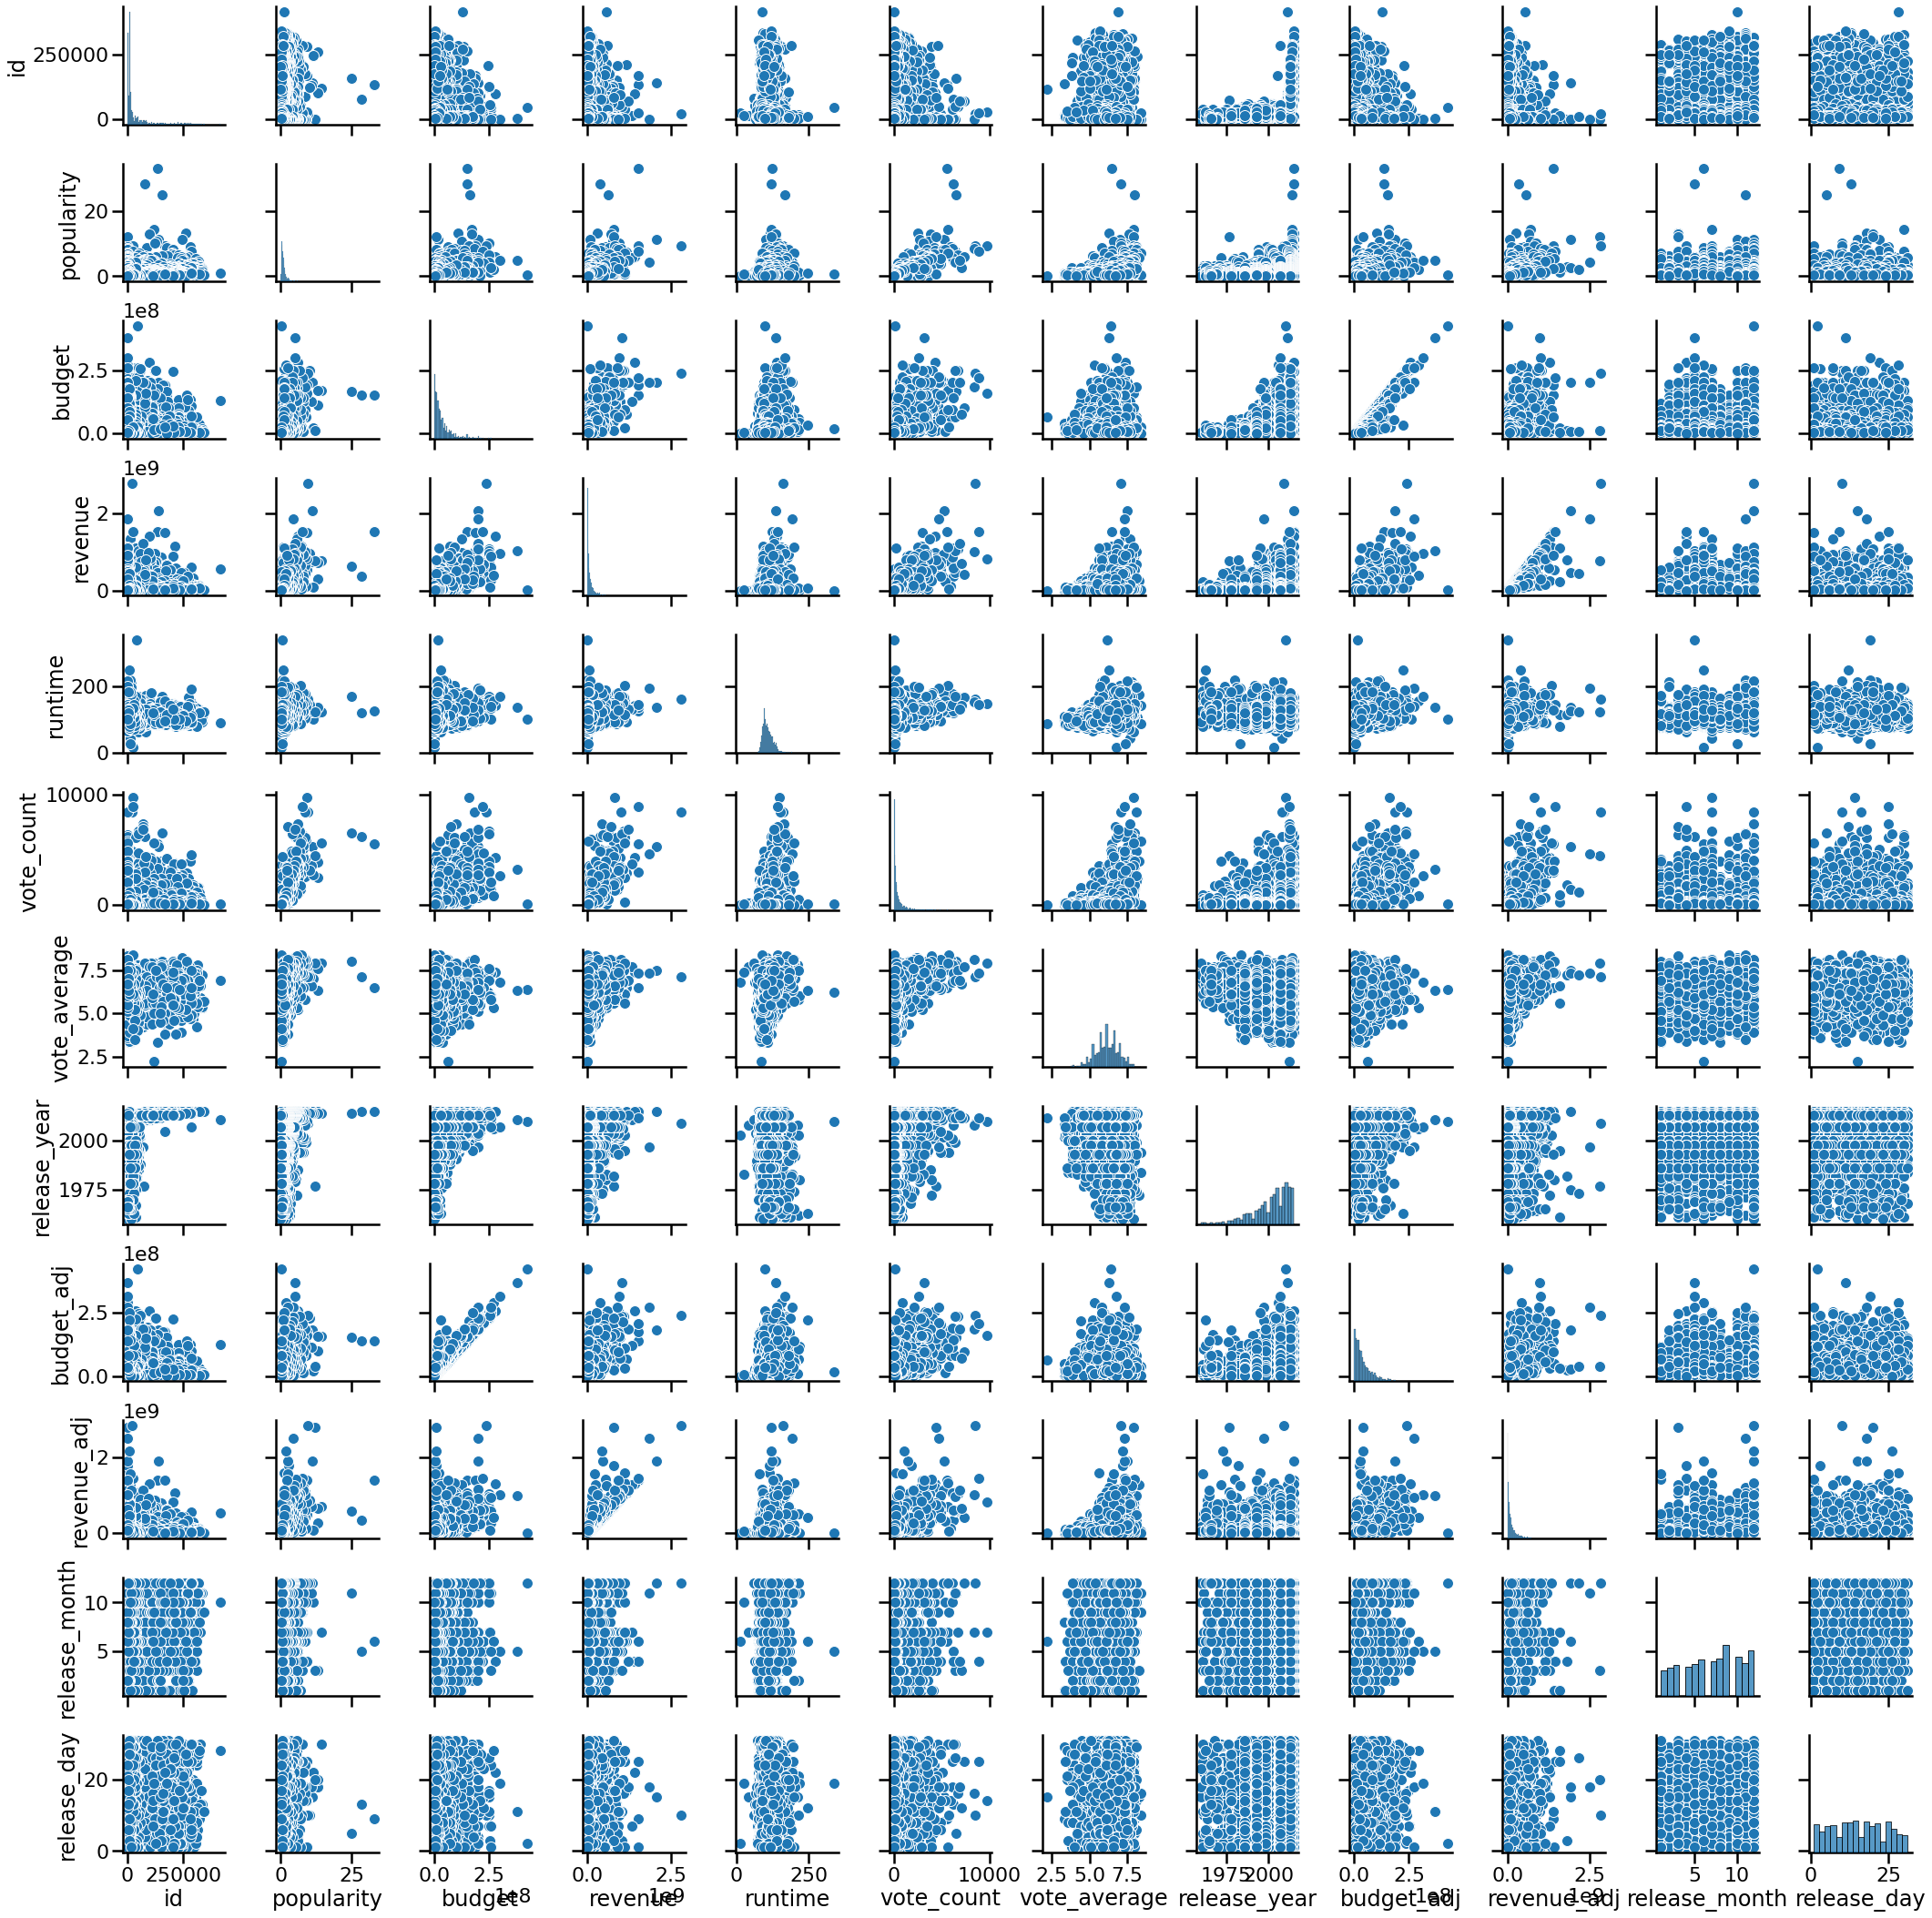

In [100]:
sns.pairplot(TMDb_movies_num_clean)

plt.title('pair plot\n')


Text(0.5, 1.0, 'pair plot \n')

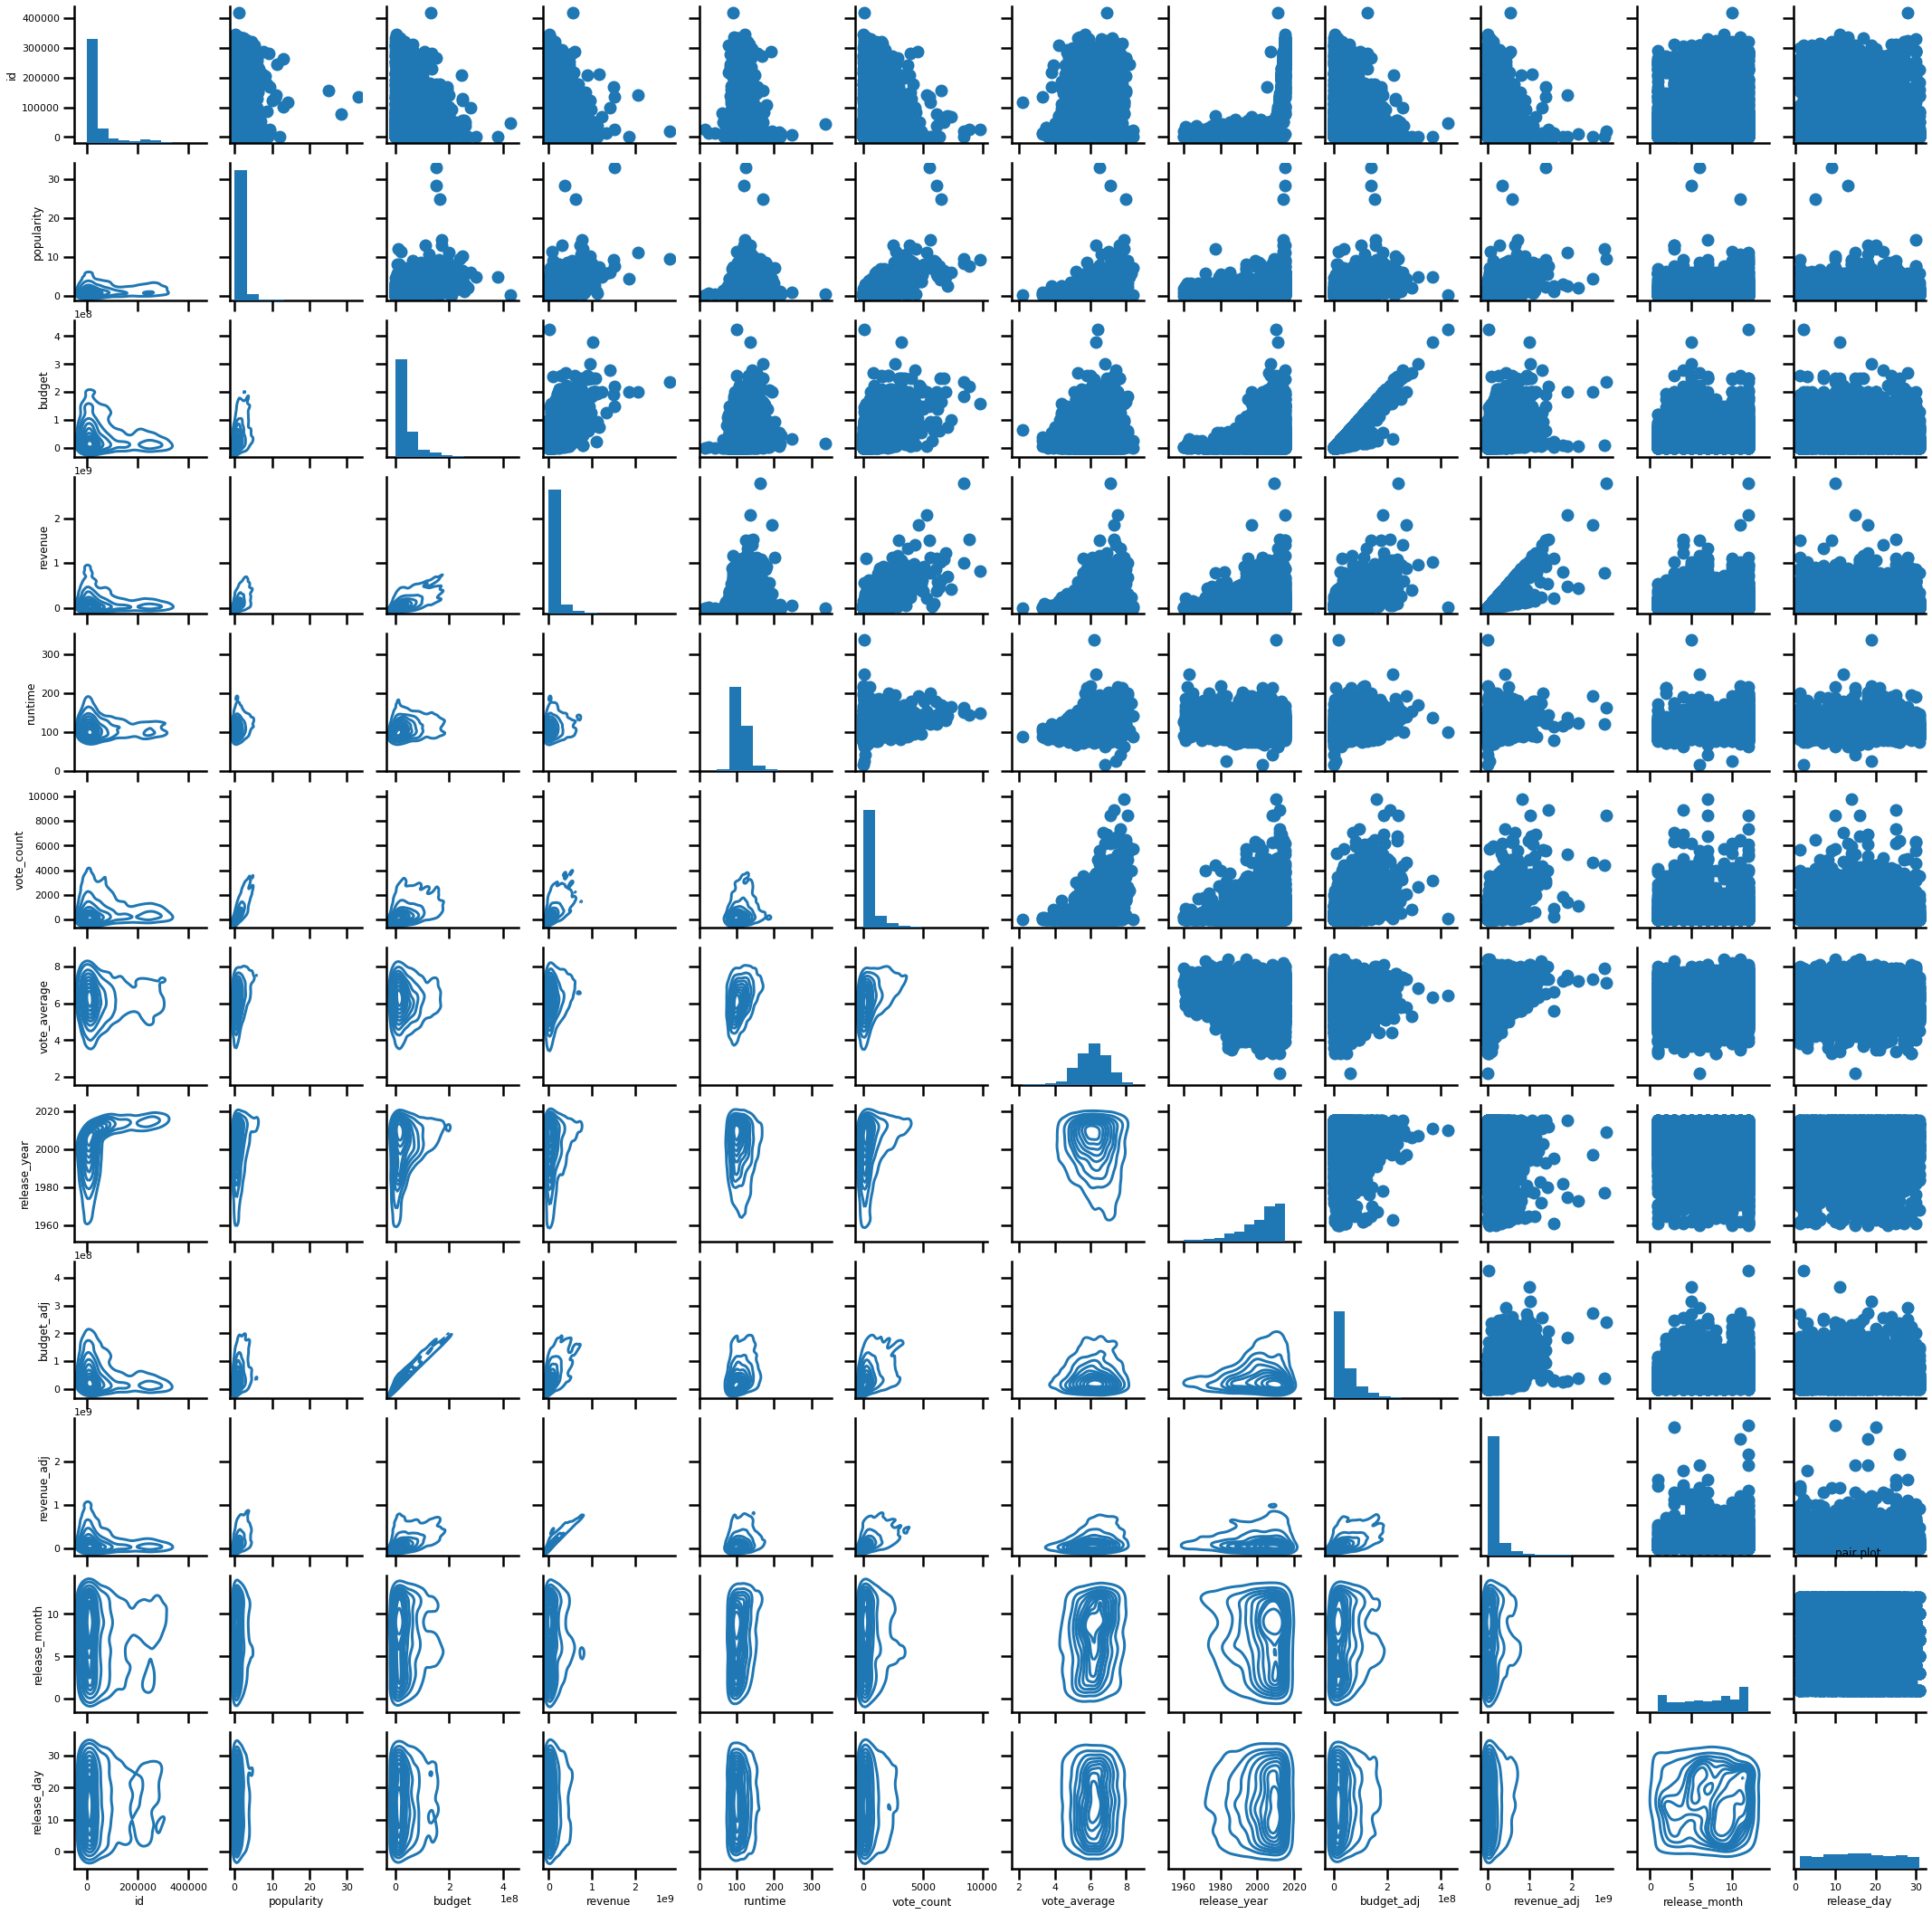

In [150]:
g = sns.PairGrid(TMDb_movies_num_clean)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

plt.title('pair plot \n')

Text(0, 0.5, 'Revenue change')

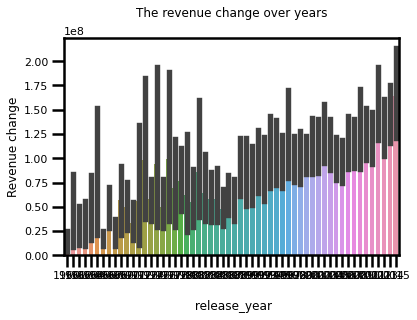

In [139]:
sns.set_context('poster',font_scale=0.5)
sns.barplot(x ='release_year',y='revenue',data=TMDb_movies_num_clean)

plt.title('The revenue change over years\n')
plt.xlabel('\n release_year')
plt.ylabel('Revenue change')

In [111]:
TMDb_movies_num_clean = TMDb_movies_num_clean.drop(['id'], axis=1)

Text(0.5, 1.0, 'heatmap for the entiry data \n')

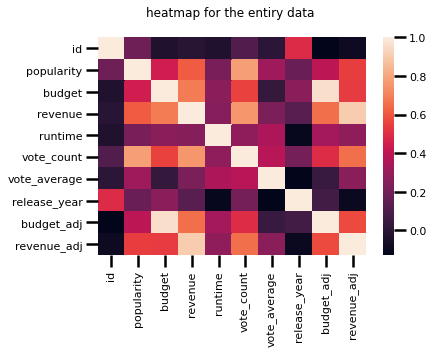

In [140]:
sns.heatmap(TMDb_movies_num_clean.drop(['release_day','release_month'], axis=1).corr())

plt.title('heatmap for the entiry data \n')


Text(0.5, 1.0, 'The clustermap for the entiry data \n')

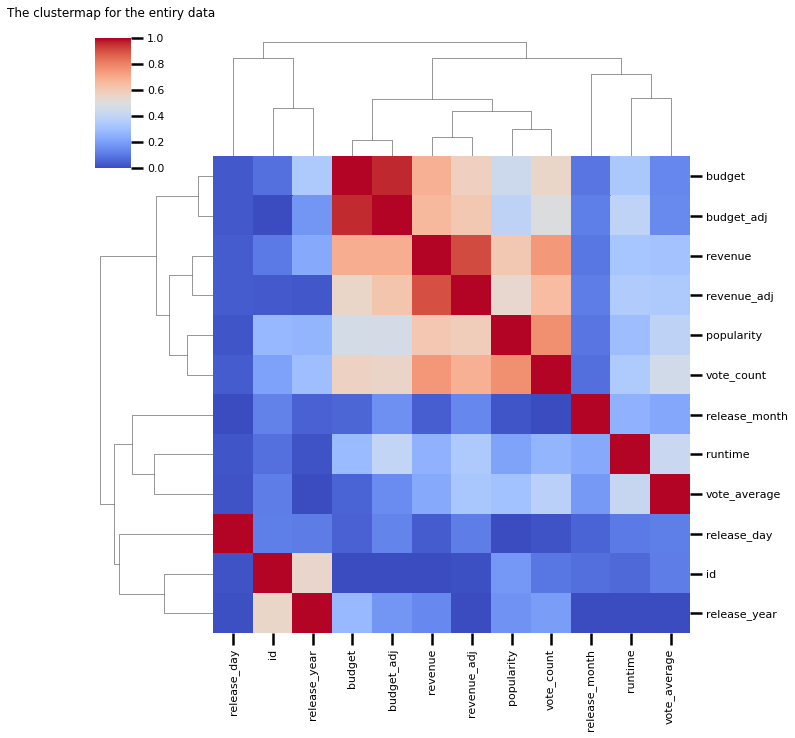

In [147]:
sns.clustermap(TMDb_movies_num_clean.corr(),cmap='coolwarm',standard_scale=1)

plt.title('The clustermap for the entiry data \n',loc= 'center')


Text(0, 0.5, 'vote_average change ')

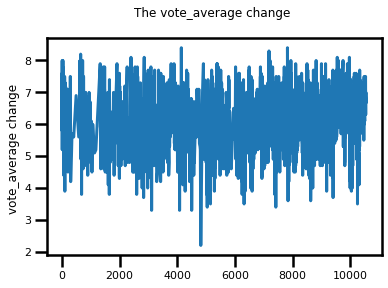

In [145]:
plt.plot(TMDb_movies_clean['vote_average'])

plt.title('The vote_average change \n')
plt.ylabel('vote_average change ')

# save the clean data into CSV File

In [121]:
TMDb_movies_clean.to_csv('TMDb_movies_clean.csv',index=False,encoding='utf-8')
TMDb_movies_num_clean.to_csv('TMDb_movies_num_clean.csv',index=False,encoding='utf-8')


### Conclusions
Based on all of the discovery above, some conclusions are drawn:

- The revenue changed drastically over the year but showed an overall increase. The 1960s accounts for the least, while the 2010s accounts for the most.

- The revenue of high revenue movie shows a strong positive correlation with budget and popularity, and a weak correlation with average voting.

- The most popular genre of the movie changed over the year, although it shows the stability in some periods. Over the year, animation, fantasy, and adventure account for a large proportion of the most popular genre.

- The limitation of this research is that there are so many data that have been cleaned in this report. These datas are seen as anomalies since they contains NaN, duplicates, or 0 in some or all columns. The amount of data changed from 10866 to 3854. The change is huge so that the results may not represent the population.

